<center>
<img src="https://laelgelcpublic.s3.sa-east-1.amazonaws.com/lael_50_years_narrow_white.png.no_years.400px_96dpi.png" width="300" alt="LAEL 50 years logo">
<h3>APPLIED LINGUISTICS GRADUATE PROGRAMME (LAEL)</h3>
</center>
<hr>

# Corpus Linguistics - Study 1 - Phase 2 - Fernanda

This phase aims at:

- Compiling the target corpus for a pilot Lexical Multi-Dimensional Analysis.

## Prerequisites

Make sure the prerequisites in [CL_LMDA_prerequisites](https://github.com/laelgelc/laelgelc/blob/main/CL_LMDA_prerequisites.ipynb) are satisfied.

## Required Python packages

- pandas
- numpy
- seaborn
- matplotlib

## Import the required libraries

In [10]:
import os
import sys
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Define input variables

In [2]:
input_directory = 'cl_st1_ph1_output'
output_directory = 'cl_st1_ph2_output'

## Create output directory

In [3]:
# Check if the output directory already exists. If it does, do nothing. If it doesn't exist, create it.
if os.path.exists(output_directory):
    print('Output directory already exists.')
else:
    try:
        os.makedirs(output_directory)
        print('Output directory successfully created.')
    except OSError as e:
        print('Failed to create the directory:', e)
        sys.exit(1)

Output directory successfully created.


## Import the data into a DataFrame

In [3]:
df_fatec_2 = pd.read_json(f"{input_directory}/cl_st1_ph1_fernanda.jsonl", lines=True)

In [4]:
df_fatec_2

,Root Directory,Document Type,Year,Branch,Unit,File,File Path,Text ID,Section,Paragraph,Word Count NLTK,Text Paragraph
0,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 1,38,"A Fatec Baixada Santista – Rubens Lara, possui..."
1,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 2,81,Por meio do desenvolvimento do presente relató...
2,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,77,Para a efetivação do cronograma destacam-se al...
3,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 2,39,Cabe ressaltar que as atividades de sensibiliz...
4,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 3,147,"Na FATEC Baixada Santista Rubens Lara, as ativ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3556,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 2,24,Recomenda-se a implementação de abordagens Ira...
3557,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,75,Outro aspecto examinado foi o perfil emergente...
3558,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,57,A iniciativa de preparar os alunos para o Exam...
3559,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 5,61,"Além disso, é importante reconhecer o impacto ..."


In [5]:
df_fatec_2.dtypes

Root Directory     object
Document Type      object
Year               object
Branch             object
Unit               object
File               object
File Path          object
Text ID            object
Section            object
Paragraph          object
Word Count NLTK     int64
Text Paragraph     object
dtype: object

## Data wrangling

### Drop short paragraphs

#### Shorter than 10 words

In [6]:
mask_short = df_fatec_2['Word Count NLTK'] <= 10
df_short_paragraphs = df_fatec_2.loc[mask_short, ['Text Paragraph']]
df_short_paragraphs

,Text Paragraph
916,None
2580,Atender a NR-5 que regulamenta a constituição ...
2883,ATIVIDADES NÃO REALIZADAS E JUSTIFICATIVAS
2884,Implantação da Revista eletrônica da Fatec Mauá.
2959,ATIVIDADES NÃO REALIZADAS E JUSTIFICATIVAS Não...
3007,RELATÓRIO ANUAL DE ATIVIDADES – RAA. FATEC IPI...
3023,ATIVIDADES REALIZADAS
3034,ATIVIDADES NÃO REALIZADAS E JUSTIFICATIVAS
3060,11. Realização do Exame TOIC;
3065,RELATÓRIO ANUAL DE ATIVIDADES - RAA Unidade: F...


#### Drop the paragraphs

In [7]:
# Drop rows from df_fatec_2 where mask_short is True
initial_count = len(df_fatec_2)
removed_count = int(mask_short.sum())

df_fatec_2 = df_fatec_2.loc[~mask_short].reset_index(drop=True)

print(f"Dropped {removed_count} short paragraphs; remaining rows: {len(df_fatec_2)}")
df_fatec_2

Dropped 22 short paragraphs; remaining rows: 3539


,Root Directory,Document Type,Year,Branch,Unit,File,File Path,Text ID,Section,Paragraph,Word Count NLTK,Text Paragraph
0,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 1,38,"A Fatec Baixada Santista – Rubens Lara, possui..."
1,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 2,81,Por meio do desenvolvimento do presente relató...
2,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,77,Para a efetivação do cronograma destacam-se al...
3,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 2,39,Cabe ressaltar que as atividades de sensibiliz...
4,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 3,147,"Na FATEC Baixada Santista Rubens Lara, as ativ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3534,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 2,24,Recomenda-se a implementação de abordagens Ira...
3535,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,75,Outro aspecto examinado foi o perfil emergente...
3536,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,57,A iniciativa de preparar os alunos para o Exam...
3537,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 5,61,"Além disso, é importante reconhecer o impacto ..."


### Drop duplicate paragraphs

#### Identify duplicate paragraphs

In [8]:
mask_dupes = df_fatec_2['Text Paragraph'].notna() & df_fatec_2['Text Paragraph'].duplicated(keep=False)
df_fatec_2.loc[mask_dupes, ['Text Paragraph']].sort_values('Text Paragraph')

,Text Paragraph
3236,2- Alunos que evidenciam o sentimento de perte...
3210,2- Alunos que evidenciam o sentimento de perte...
3237,3- Projetos pedagógicos como meio privilegiado...
3211,3- Projetos pedagógicos como meio privilegiado...
3238,4- Responsabilidade Social ✓ Manutenção do Pro...
...,...
3291,Vestibular: A Fatec Rubens Lara continua sendo...
2940,"f) Auxiliar e incentivar o aluno, por meio de ..."
3126,"f) Auxiliar e incentivar o aluno, por meio de ..."
3129,i) Implementar parcerias com empresas da regiã...


#### Drop the paragraphs

In [9]:
# Drop duplicate paragraphs, keeping the first occurrence
mask_drop_dupes = df_fatec_2['Text Paragraph'].duplicated(keep='first')
removed_dupes = int(mask_drop_dupes.sum())

df_fatec_2 = df_fatec_2.loc[~mask_drop_dupes].reset_index(drop=True)

print(f"Dropped {removed_dupes} duplicate paragraphs; remaining rows: {len(df_fatec_2)}")
df_fatec_2

Dropped 285 duplicate paragraphs; remaining rows: 3254


,Root Directory,Document Type,Year,Branch,Unit,File,File Path,Text ID,Section,Paragraph,Word Count NLTK,Text Paragraph
0,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 1,38,"A Fatec Baixada Santista – Rubens Lara, possui..."
1,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 2,81,Por meio do desenvolvimento do presente relató...
2,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,77,Para a efetivação do cronograma destacam-se al...
3,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 2,39,Cabe ressaltar que as atividades de sensibiliz...
4,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 3,147,"Na FATEC Baixada Santista Rubens Lara, as ativ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3249,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 2,24,Recomenda-se a implementação de abordagens Ira...
3250,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,75,Outro aspecto examinado foi o perfil emergente...
3251,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,57,A iniciativa de preparar os alunos para o Exam...
3252,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 5,61,"Além disso, é importante reconhecer o impacto ..."


### Determine the `Paragraph Count` per `Document Type`

In [10]:
df_paragraphs_per_document_type = (
    df_fatec_2
    .groupby('Document Type', dropna=False)
    .size()
    .reset_index(name='Paragraph Count')
    .sort_values(['Paragraph Count', 'Document Type'], ascending=[False, True])
    .reset_index(drop=True)
)
df_paragraphs_per_document_type

,Document Type,Paragraph Count
0,cpa,1183
1,pga,979
2,raa,605
3,pdi,415
4,rade,72


### Export to a file

In [11]:
df_fatec_2.to_json(f"{output_directory}/cl_st1_ph1_tc_fernanda.jsonl", orient='records', lines=True)

In [12]:
df_fatec_2.to_excel(f"{output_directory}/cl_st1_ph1_tc_fernanda.xlsx", index=False)

## Import the Target Corpus into a DataFrame

In [13]:
df_fatec_tc = pd.read_json(f"{output_directory}/cl_st1_ph1_tc_fernanda.jsonl", lines=True)

In [14]:
df_fatec_tc

,Root Directory,Document Type,Year,Branch,Unit,File,File Path,Text ID,Section,Paragraph,Word Count NLTK,Text Paragraph
0,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 1,38,"A Fatec Baixada Santista – Rubens Lara, possui..."
1,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 2,81,Por meio do desenvolvimento do presente relató...
2,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,77,Para a efetivação do cronograma destacam-se al...
3,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 2,39,Cabe ressaltar que as atividades de sensibiliz...
4,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 3,147,"Na FATEC Baixada Santista Rubens Lara, as ativ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3249,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 2,24,Recomenda-se a implementação de abordagens Ira...
3250,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,75,Outro aspecto examinado foi o perfil emergente...
3251,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,57,A iniciativa de preparar os alunos para o Exam...
3252,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 5,61,"Além disso, é importante reconhecer o impacto ..."


### Identify occurrences of the `pipe` character in the `Text Paragraph` column

Further on, a few columns of the DataFrame are going to be exported into the file `tweets.txt` whose columns need to be delimited by the `pipe` character. Therefore, it is recommended that any occurrences of the `pipe` character in the `Text Paragraph` column are replaced by another character.

In [15]:
mask_pipe = df_fatec_tc['Text Paragraph'].str.contains(r'\|', na=False)
df_with_pipe = df_fatec_tc.loc[mask_pipe, ['Text Paragraph']]
df_with_pipe

,Text Paragraph


## Tokenise

Please refer to [What is tokenization in NLP?](https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/).

### Inspect one row

In [16]:
print(df_fatec_tc.at[17, 'Text Paragraph'])

Para a efetivação do cronograma destaca-se algumas das ações para a realização dos procedimentos de autoavaliação. 1. divulgação no site (pop up), facebook, Instagram e linkedIn da Fatec Mauá através da arte abaixo: 2. envio de e-mail para professores, alunos e pessoal técnico-administrativo. 3. Espaço da aula destinado para preenchimento do Websai; 4. Notificação via Teams aos professores; 5. Mensagens de whatsapp (individual) nos dias finais do processo; 6. Reforço aos alunos por representantes dos alunos da CPA e por representantes de sala; 7. Ingresso dos Coordenadores em aulas para sensibilizar alunos sobre o WebSAI; 8. Envio de mensagem pelos Coordenadores ao e-mail institucional dos alunos.


### Tokenise

In [17]:
# Defining a function to tokenise a string
def tokenise_string(input_line):
    # Replace URLs with placeholders
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+\b'
    placeholder = '<URL>'  # Choose a unique placeholder
    urls = re.findall(url_pattern, input_line)
    tokenised_line = re.sub(url_pattern, placeholder, input_line)  # Replace URLs with placeholders

    # Replace curly quotes with straight ones
    tokenised_line = tokenised_line.replace('“', '"').replace('”', '"').replace("‘", "'").replace("’", "'")
    # Separate common punctuation marks with spaces
    tokenised_line = re.sub(r'([.\!?,"\'/()])', r' \1 ', tokenised_line)
    # Add a space before '#'
    tokenised_line = re.sub(r'(?<!\s)#', r' #', tokenised_line)  # Add a space before '#' if it is not already preceded by one
    # Reduce extra spaces by a single space
    tokenised_line = re.sub(r'\s+', ' ', tokenised_line)

    # Replace the placeholders with the respective URLs
    for url in urls:
        tokenised_line = tokenised_line.replace(placeholder, url, 1)

    return tokenised_line

# Tokenising the strings
df_fatec_tc['Text Paragraph'] = df_fatec_tc['Text Paragraph'].apply(tokenise_string)

### Reinspect the row

In [18]:
print(df_fatec_tc.at[17, 'Text Paragraph'])

Para a efetivação do cronograma destaca-se algumas das ações para a realização dos procedimentos de autoavaliação . 1 . divulgação no site ( pop up ) , facebook , Instagram e linkedIn da Fatec Mauá através da arte abaixo: 2 . envio de e-mail para professores , alunos e pessoal técnico-administrativo . 3 . Espaço da aula destinado para preenchimento do Websai; 4 . Notificação via Teams aos professores; 5 . Mensagens de whatsapp ( individual ) nos dias finais do processo; 6 . Reforço aos alunos por representantes dos alunos da CPA e por representantes de sala; 7 . Ingresso dos Coordenadores em aulas para sensibilizar alunos sobre o WebSAI; 8 . Envio de mensagem pelos Coordenadores ao e-mail institucional dos alunos . 


## Create the files `file_index.txt` and `tweets.txt`

### Create column `text_id`

In [19]:
df_fatec_tc['text_id'] = 'fat' + df_fatec_tc.index.astype(str).str.zfill(6)

### Create column `conversation`

In [20]:
df_fatec_tc['conversation'] = (
        'v:' +
        df_fatec_tc['Text ID'].fillna('').astype(str) + ' ' +
        df_fatec_tc['Section'].fillna('').astype(str) + ' ' +
        df_fatec_tc['Paragraph'].fillna('').astype(str)
)

#### Replace space by the `_` character

**Important**: Since the strings in the original columns contain spaces, Pandas creates `file_index.txt` with the columns enclosed with `"` - this caracter causes issues in `examples.sh` when it is executed. Therefore, spaces should be replaced by another character such as underscore.

In [21]:
# Defining a function to replace space by the '_' character
def replace_space_with_underscore(input_string):
    modified_string = re.sub(r' ', '_', input_string)
    return modified_string

In [22]:
# Replacing space by the '_' character
df_fatec_tc['conversation'] = df_fatec_tc['conversation'].apply(replace_space_with_underscore)

### Create column `date`

In [23]:
df_fatec_tc['date'] = 'd:' + df_fatec_tc['Year'].fillna('').astype(str)

### Create column `text_url`

No URL was considered for all texts.

In [24]:
df_fatec_tc['text_url'] = 'url:' + 'No_URL'

### Create column `user`

In [25]:
df_fatec_tc['user'] = (
        'u:' +
        df_fatec_tc['Branch'].fillna('').astype(str) + '_' +
        df_fatec_tc['Unit'].fillna('').astype(str)
)

### Create column `content`

In [26]:
df_fatec_tc['content'] = 'c:' + df_fatec_tc['Text Paragraph'].astype(str)

### Reorder the created columns

Please refer to:
- [Python - List Comprehension 1](https://www.w3schools.com/python/python_lists_comprehension.asp)
- [Python - List Comprehension 2](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)

In [27]:
reordered_columns = [
    'text_id',
    'conversation',
    'date',
    'text_url',
    'user',
    'content'
]

In [28]:
df_fatec_tc = df_fatec_tc[reordered_columns + [col for col in df_fatec_tc.columns if col not in reordered_columns]]

In [29]:
df_fatec_tc

,text_id,conversation,date,text_url,user,content,Root Directory,Document Type,Year,Branch,Unit,File,File Path,Text ID,Section,Paragraph,Word Count NLTK,Text Paragraph
0,fat000000,v:t000000_1_INTRODUÇÃO_Paragraph_1,d:22-23,url:No_URL,u:r06_u005,"c:A Fatec Baixada Santista – Rubens Lara , pos...",cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 1,38,"A Fatec Baixada Santista – Rubens Lara , possu..."
1,fat000001,v:t000000_1_INTRODUÇÃO_Paragraph_2,d:22-23,url:No_URL,u:r06_u005,c:Por meio do desenvolvimento do presente rela...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 2,81,Por meio do desenvolvimento do presente relató...
2,fat000002,v:t000000_2_SENSIBILIZAÇÃO_Paragraph_1,d:22-23,url:No_URL,u:r06_u005,c:Para a efetivação do cronograma destacam-se ...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,77,Para a efetivação do cronograma destacam-se al...
3,fat000003,v:t000000_2_SENSIBILIZAÇÃO_Paragraph_2,d:22-23,url:No_URL,u:r06_u005,c:Cabe ressaltar que as atividades de sensibil...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 2,39,Cabe ressaltar que as atividades de sensibiliz...
4,fat000004,v:t000000_2_SENSIBILIZAÇÃO_Paragraph_3,d:22-23,url:No_URL,u:r06_u005,"c:Na FATEC Baixada Santista Rubens Lara , as a...",cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 3,147,"Na FATEC Baixada Santista Rubens Lara , as ati..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,fat003249,v:t000112_4_CONSIDERAÇÕES_GERAIS_Paragraph_2,d:23-24,url:No_URL,u:r06_u270,c:Recomenda-se a implementação de abordagens I...,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 2,24,Recomenda-se a implementação de abordagens Ira...
3250,fat003250,v:t000112_4_CONSIDERAÇÕES_GERAIS_Paragraph_3,d:23-24,url:No_URL,u:r06_u270,c:Outro aspecto examinado foi o perfil emergen...,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,75,Outro aspecto examinado foi o perfil emergente...
3251,fat003251,v:t000112_4_CONSIDERAÇÕES_GERAIS_Paragraph_4,d:23-24,url:No_URL,u:r06_u270,c:A iniciativa de preparar os alunos para o Ex...,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,57,A iniciativa de preparar os alunos para o Exam...
3252,fat003252,v:t000112_4_CONSIDERAÇÕES_GERAIS_Paragraph_5,d:23-24,url:No_URL,u:r06_u270,"c:Além disso , é importante reconhecer o impac...",cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 5,61,"Além disso , é importante reconhecer o impacto..."


### Create the file `file_index.txt`

In [30]:
df_fatec_tc[['text_id', 'conversation', 'date', 'text_url']].to_csv('file_index.txt', sep=' ', index=False, header=False, encoding='utf-8', lineterminator='\n')

### Create the file `tweets.txt`

In [31]:
folder = 'tweets'
try:
    os.mkdir(folder)
    print(f"Folder {folder} created!")
except FileExistsError:
    print(f"Folder {folder} already exists")

Folder tweets created!


Note: The parameters `doublequote=False` and `escapechar=' '` are required to avoid that the column content is doublequoted with '"' in sentences that use characters that need to be escaped such as double quote '"' itself - this causes a malformed response from TreeTagger.

In [32]:
df_fatec_tc[['text_id', 'conversation', 'date', 'user', 'content']].to_csv(f'{folder}/tweets.txt', sep='|', index=False, header=False, encoding='utf-8', lineterminator='\n', doublequote=False, escapechar=' ')

## Tag with TreeTagger

Purpose: Annotate the texts in `tweets/tweets.txt` with part-of-speech and lemma information.
- Input
    - `file_index.txt`
    - `tweets/tweets.txt`
- Output
    - `tweets/tagged.txt`

## Process `tokenstypes`

Purpose: Capture the content tokens (specific occurrences of words) and the content types (general concept of words) from `tweets/tagged.txt`.
- Input
    - `file_index.txt`
    - `tweets/tagged.txt`
- Output
    - `tweets/tokens.txt`
    - `tweets/types.txt`

## Process `toplemmas`

`toplemmas` was processed for comparison with the keywords extraction.

Purpose: Determine the 1.000 top lemmas. **Important**: This process requires manual inspection. Non-meaningful lemmas should be excluded by updating `stoplist.sed` and reiterating the processing.
- Input
    - `tweets/types.txt`
    - `stoplist.sed`: List of rules that allows the exclusion of a certain lemmas
- Output
    - `selectedwords` = `var_index.txt`

## Process `keywords_text_counts.py`, `select_kws.py`, and `select_kws_make_selectedwords.py`

### Enrich the Target Corpus with the tokens from `tokenstypes`

In [3]:
df_fatec_tc = pd.read_json(f"{output_directory}/cl_st1_ph1_tc_fernanda.jsonl", lines=True)

In [5]:
df_fatec_tc['text_id'] = 'fat' + df_fatec_tc.index.astype(str).str.zfill(6)

In [6]:
df_fatec_tc_columns = df_fatec_tc.columns.tolist()
print(df_fatec_tc_columns)

['Root Directory', 'Document Type', 'Year', 'Branch', 'Unit', 'File', 'File Path', 'Text ID', 'Section', 'Paragraph', 'Word Count NLTK', 'Text Paragraph', 'text_id']


In [7]:
reordered_columns = [
    'Root Directory',
    'Document Type',
    'Year',
    'Branch',
    'Unit',
    'File',
    'File Path',
    'text_id'
]

In [8]:
df_fatec_tc = df_fatec_tc[reordered_columns + [col for col in df_fatec_tc.columns if col not in reordered_columns]]

In [12]:
folder = 'tweets'
column_names = ['text_id', 'Text Paragraph Tokens']

# Safe read: parse each line, splitting once on the literal "|c:"
records = []
with open(f"{folder}/tokens.txt", 'r', encoding='utf-8', errors='replace') as f:
    for lineno, line in enumerate(f, start=1):
        line = line.rstrip('\n')
        if not line:
            continue
        # Split once on the exact marker
        if '|c:' not in line:
            # Optionally log/skip malformed lines
            # print(f"Skipping malformed line {lineno}: {line}")
            continue
        left, right = line.split('|c:', 1)
        records.append((left, right.strip()))

df_tokens = pd.DataFrame(records, columns=column_names)

In [14]:
df_fatec_tc_2 = df_fatec_tc.merge(df_tokens, on='text_id', how='left')

In [15]:
df_fatec_tc_2

,Root Directory,Document Type,Year,Branch,Unit,File,File Path,text_id,Text ID,Section,Paragraph,Word Count NLTK,Text Paragraph,Text Paragraph Tokens
0,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,fat000000,t000000,1 INTRODUÇÃO,Paragraph 1,38,"A Fatec Baixada Santista – Rubens Lara, possui...",baixar santista possuir crença avaliação instr...
1,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,fat000001,t000000,1 INTRODUÇÃO,Paragraph 2,81,Por meio do desenvolvimento do presente relató...,meio desenvolvimento presente relatório versão...
2,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,fat000002,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,77,Para a efetivação do cronograma destacam-se al...,efetivação cronograma destacar ação realização...
3,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,fat000003,t000000,2 SENSIBILIZAÇÃO,Paragraph 2,39,Cabe ressaltar que as atividades de sensibiliz...,caber ressaltar atividade sensibilização prese...
4,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,fat000004,t000000,2 SENSIBILIZAÇÃO,Paragraph 3,147,"Na FATEC Baixada Santista Rubens Lara, as ativ...",baixar santista atividade sensibilização reali...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,fat003249,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 2,24,Recomenda-se a implementação de abordagens Ira...,recomendar implementação abordagem iransdiscip...
3250,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,fat003250,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,75,Outro aspecto examinado foi o perfil emergente...,aspecto examinar perfil emergente aluno vez ca...
3251,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,fat003251,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,57,A iniciativa de preparar os alunos para o Exam...,iniciativa preparar aluno exame enade crucial ...
3252,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,fat003252,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 5,61,"Além disso, é importante reconhecer o impacto ...",importante reconhecer impacto pandemia desempe...


### Export to a file

In [16]:
df_fatec_tc_2.to_json(f"{output_directory}/cl_st1_ph1_tc_2_fernanda.jsonl", orient='records', lines=True)

In [17]:
df_fatec_tc_2.to_excel(f"{output_directory}/cl_st1_ph1_tc_2_fernanda.xlsx", index=False)

### Create `lemma_tokens` directory structure and write token files per `text_id` grouped by `Document Type`

In [18]:
base_dir = os.path.join('tweets', 'lemma_tokens')
os.makedirs(base_dir, exist_ok=True)

required_cols = {'text_id', 'Document Type', 'Text Paragraph Tokens'}
missing = required_cols - set(df_fatec_tc_2.columns)
if missing:
    raise KeyError(f"Missing required columns in df_fatec_tc_2: {missing}")

for _, row in df_fatec_tc_2.iterrows():
    doc_type = str(row['Document Type']) if pd.notna(row['Document Type']) else 'Unknown'
    text_id = str(row['text_id'])
    tokens_str = row['Text Paragraph Tokens']

    # Ensure directory for this Document Type exists
    target_dir = os.path.join(base_dir, doc_type)
    os.makedirs(target_dir, exist_ok=True)

    # Prepare tokens list: assume space-separated tokens in 'Text Paragraph Tokens'
    if pd.isna(tokens_str):
        tokens = []
    else:
        tokens = str(tokens_str).split()

    out_path = os.path.join(target_dir, f"{text_id}.txt")
    with open(out_path, 'w', encoding='utf-8', newline='\n') as fh:
        fh.write('\n'.join(tokens))

## Process `sas`

Purpose: Prepare input data for processing in SAS.
- Input
    - `tweets/types.txt`
    - `selectedwords`
    - `file_index.txt`
- Output
    - `columns`
    - `sas/data.txt`
    - `sas/dates.txt`
    - `sas/wcount.txt`

## Process `datamatrix`

Purpose: Prepares input data for calculating the correlation matrix.
- Input
    - `file_index.txt`
    - `columns`
    - `selectedwords`
- Output
    - `file_ids.txt`
    - `data.csv`

## Process `correlationmatrix`

Purpose: Calculates the correlation matrix.
- Input
    - `data.csv`
- Output
    - `correlation`

## Process `formats`

Purpose: Prepare input data for processing in SAS.
- Input
    - `data.csv`
    - `selectedwords`
- Output
    - `sas/corr.txt`
    - `sas/word_labels_format.sas`

## Process the statistical procedures on SAS

- Log in to your [SAS OnDemand for Academics](https://welcome.oda.sas.com/) account
- Proceed as indicated in this [video tutorial](https://youtu.be/I3u9zD3jyOA?si=68uIKVc2iusGG2KY)

## Process `examples`

Purpose: Extract examples for analysis.
- Input
    - `sas/output_"$project"/loadtable.html`
    - `sas/output_"$project"/"$project"_scores.tsv`
    - `sas/output_"$project"/"$project"_scores_only.tsv`
- Output
    - `examples/factors`
    - `example files`

## Corpus Design information

### Define input variables

In [11]:
input_directory = 'sas'
output_directory = 'sas'

### Import `sas/wcount.txt` into a DataFrame

In [3]:
# Define the column names
column_names = ['Text ID', 'Word Count']

# Import the file
df_wcount = pd.read_csv(f"{input_directory}/wcount.txt", sep=' ', header=None, names=column_names)

In [4]:
df_wcount

,Text ID,Word Count
0,fat000000,39
1,fat000001,84
2,fat000002,78
3,fat000003,40
4,fat000004,148
...,...,...
3249,fat003249,25
3250,fat003250,76
3251,fat003251,58
3252,fat003252,62


Descriptive statistics for Word Count:
- Count: 3254
- Mean: 74.79
- Std (sample): 49.03
- Min: 10
- Q1 (25%): 45.00
- Median (50%): 65.00
- Q3 (75%): 90.00
- Max: 726

IQR outlier thresholds:
- Lower fence: -22.50
- Upper fence: 157.50
Outliers found: 170


,Text ID,Word Count
0,fat000647,159
1,fat002728,159
2,fat002910,159
3,fat000483,159
4,fat001815,159
...,...,...
165,fat000714,428
166,fat000008,434
167,fat001124,442
168,fat000935,445


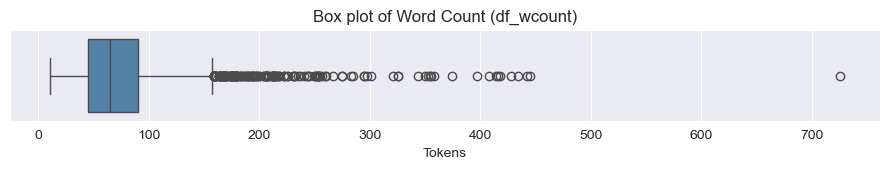

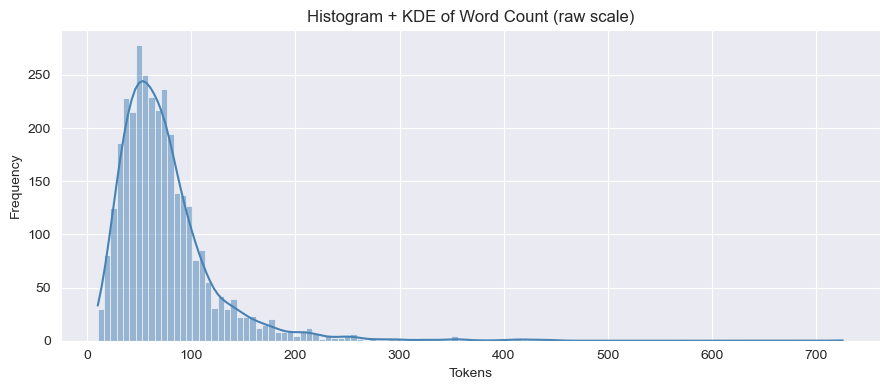

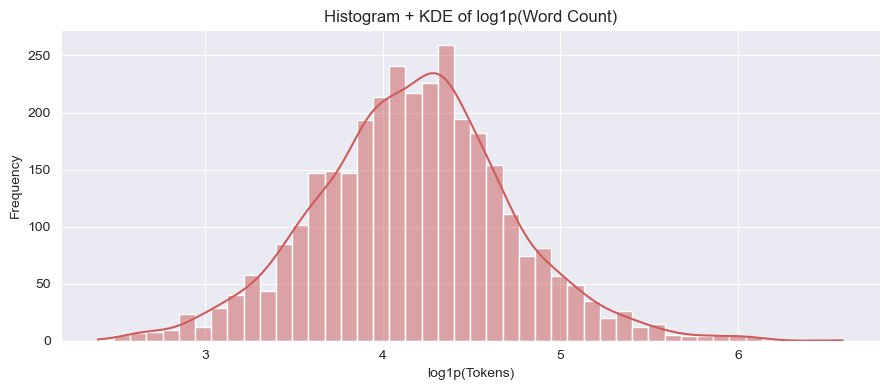

In [5]:
# Select the series
series = df_wcount['Word Count'].dropna()

# Summary stats
mean_val = series.mean()
std_val = series.std(ddof=1)  # sample standard deviation
desc = series.describe()  # count, mean, std, min, 25%, 50%, 75%, max

print('Descriptive statistics for Word Count:')
print(f"- Count: {int(desc['count'])}")
print(f"- Mean: {mean_val:.2f}")
print(f"- Std (sample): {std_val:.2f}")
print(f"- Min: {int(desc['min'])}")
print(f"- Q1 (25%): {desc['25%']:.2f}")
print(f"- Median (50%): {desc['50%']:.2f}")
print(f"- Q3 (75%): {desc['75%']:.2f}")
print(f"- Max: {int(desc['max'])}")

# IQR-based outlier detection
q1, q3 = series.quantile([0.25, 0.75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

outlier_mask = (series < lower_fence) | (series > upper_fence)
outliers = (
    df_wcount.loc[outlier_mask, ['Text ID', 'Word Count']]
    .sort_values('Word Count')
    .reset_index(drop=True)
)

print(f"\nIQR outlier thresholds:")
print(f"- Lower fence: {lower_fence:.2f}")
print(f"- Upper fence: {upper_fence:.2f}")
print(f"Outliers found: {len(outliers)}")
display(outliers)

# Box plot
plt.figure(figsize=(9, 1.8))
sns.boxplot(x=series, color='steelblue')
plt.title('Box plot of Word Count (df_wcount)')
plt.xlabel('Tokens')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/cl_st1_ph2_fernanda_boxplot.png", dpi=300)

plt.show()

# Raw scale: Histogram + KDE
plt.figure(figsize=(9, 4))
sns.histplot(series, bins='auto', kde=True, color='steelblue')
plt.title('Histogram + KDE of Word Count (raw scale)')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/cl_st1_ph2_fernanda_histogram.png", dpi=300)

plt.show()

# Log scale via transformation: Histogram + KDE
log_series = np.log1p(series)  # log(1 + x) to handle zeros safely
plt.figure(figsize=(9, 4))
sns.histplot(log_series, bins='auto', kde=True, color='indianred')
plt.title('Histogram + KDE of log1p(Word Count)')
plt.xlabel('log1p(Tokens)')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/cl_st1_ph2_fernanda_histogram_log_scale.png", dpi=300)

plt.show()

### Import `sas/dates.txt` into a DataFrame

In [6]:
# Define the column names
column_names = ['Text ID', 'Year 1', 'Year 2']

# Import the file
df_dates = pd.read_csv(f"{input_directory}/dates.txt", sep=' ', header=None, names=column_names)

In [7]:
df_dates

,Text ID,Year 1,Year 2
0,fat000000,22,23.0
1,fat000001,22,23.0
2,fat000002,22,23.0
3,fat000003,22,23.0
4,fat000004,22,23.0
...,...,...,...
3249,fat003249,23,24.0
3250,fat003250,23,24.0
3251,fat003251,23,24.0
3252,fat003252,23,24.0


In [8]:
# Make 'Year 2' equal to 'Year 1' where 'Year 2' is NaN
df_dates['Year 2'] = df_dates['Year 2'].fillna(df_dates['Year 1'])

# Convert 'Year 1' and 'Year 2' to pandas datetime as 4-digit years of the current century
current_century = (pd.Timestamp.now().year // 100) * 100
for col in ['Year 1', 'Year 2']:
    years_int = pd.to_numeric(df_dates[col], errors='coerce').astype('Int64')
    full_years = years_int.where(years_int >= 100, years_int + current_century)
    df_dates[col] = pd.to_datetime(full_years.astype('float').astype('Int64').astype(str), format='%Y', errors='coerce')

# Format as 4-digit year strings (keeping dtype datetime for operations, but show formatted)
df_dates['Year 1'] = df_dates['Year 1'].dt.strftime('%Y')
df_dates['Year 2'] = df_dates['Year 2'].dt.strftime('%Y')

df_dates

,Text ID,Year 1,Year 2
0,fat000000,2022,2023
1,fat000001,2022,2023
2,fat000002,2022,2023
3,fat000003,2022,2023
4,fat000004,2022,2023
...,...,...,...
3249,fat003249,2023,2024
3250,fat003250,2023,2024
3251,fat003251,2023,2024
3252,fat003252,2023,2024


### Combining the `df_dates` and `df_wcount` DataFrames into `df_corpus_design` DataFrame

In [9]:
# Merge the DataFrames on 'Text ID'
merged_df = pd.merge(df_dates, df_wcount, on='Text ID')

# Group by ('Year 1', 'Year 2') to get 'Text Count' and 'Word Count'
df_corpus_design = merged_df.groupby(['Year 1', 'Year 2']).agg({
    'Text ID': 'count',
    'Word Count': 'sum'
}).reset_index()

# Rename columns to match the requirements
df_corpus_design.rename(columns={'Text ID': 'Text Count'}, inplace=True)

# Append totals row at the bottom
totals_row = {
    'Year 1': 'Total',
    'Year 2': '',
    'Text Count': df_corpus_design['Text Count'].sum(),
    'Word Count': df_corpus_design['Word Count'].sum()
}
df_corpus_design = pd.concat([df_corpus_design, pd.DataFrame([totals_row])], ignore_index=True)

df_corpus_design

,Year 1,Year 2,Text Count,Word Count
0,2022,2022,268,15555
1,2022,2023,486,34740
2,2023,2023,832,69373
3,2023,2024,418,31477
4,2024,2024,402,31145
5,2024,2025,351,28564
6,2025,2025,213,16524
7,2026,2026,284,15992
8,Total,,3254,243370


### Create a LaTeX table

In [12]:
title = 'Text and Word Count by Year Range'
filename = 'df_corpus_design'

In [13]:
caption = title
label = f"tab:{filename}"
tex_filename = f"{filename}.tex"

In [14]:
tex_table = df_corpus_design.to_latex(longtable=True, caption=caption, label=label)

In [15]:
with open(f"{output_directory}/{tex_filename}", 'w', encoding='utf8', newline='\n') as file:
    file.write(tex_table)